<a href="https://colab.research.google.com/github/faithtinarwo/ai_tools/blob/main/AI_software_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1: Classical ML with Scikit-learn

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the Iris dataset
# The Iris dataset is a classic and clean dataset, typically without missing values,
# but we'll include a check for demonstration purposes.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target) # Target is already numerical (0, 1, 2)

print("--- Task 1: Classical ML with Scikit-learn ---")
print("\nOriginal Iris Dataset Info:")
print(X.info())
print("\nFirst 5 rows of features:")
print(X.head())
print("\nFirst 5 rows of target labels (numerical):")
print(y.head())

# --- Data Preprocessing ---

# 1. Handle Missing Values (Check for missing values, although Iris is typically clean)
print("\nChecking for missing values...")
if X.isnull().sum().sum() == 0:
    print("No missing values found in features.")
else:
    print("Missing values found. Handling strategy (e.g., imputation) would go here.")
    # For demonstration, if there were missing values, a common approach for numerical data:
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(strategy='mean')
    # X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 2. Encode Labels (Iris target is already numerical, but if it were strings, we'd encode)
# For demonstration, let's pretend y was ['setosa', 'versicolor', 'virginica']
# and show how to encode it if needed.
# Since iris.target is already numerical (0, 1, 2), we don't strictly need LabelEncoder here
# for the model to work, but it's good practice to demonstrate for categorical targets.
print("\nEncoding target labels (if necessary)...")
# Let's create a dummy string target for demonstration
y_species_names = iris.target_names[y]
# print(f"Example of target names: {y_species_names[:5]}")

# If y_species_names was our original target:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_species_names)
print(f"Original numerical target first 5: {y.head().tolist()}")
print(f"Encoded target from string names first 5: {y_encoded[:5].tolist()}")
print(f"Classes found by LabelEncoder: {label_encoder.classes_}")

# We will use the original numerical 'y' for consistency with load_iris output
y_final = y

# 3. Split the data into training and testing sets
# Stratify ensures that the proportion of target classes is the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.3, random_state=42, stratify=y_final)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Distribution of classes in training set:\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"Distribution of classes in test set:\n{pd.Series(y_test).value_counts(normalize=True)}")


# --- Train a Decision Tree Classifier ---

print("\nTraining Decision Tree Classifier...")
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Model trained successfully.")

# --- Evaluate the Model ---

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
# precision_score and recall_score require 'average' parameter for multiclass classification
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# 'micro': Calculate metrics globally by counting the total true positives, false negatives, and false positives.
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\n--- Model Evaluation Results ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Optional: Display classification report for more detailed metrics per class
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# You can also visualize the decision tree (requires graphviz)
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 10))
# plot_tree(decision_tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.title("Decision Tree Visualization")
# plt.show()

--- Task 1: Classical ML with Scikit-learn ---

Original Iris Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Fir

--- Task 2: Deep Learning with TensorFlow ---

Loading and preprocessing MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (60000,)
Test labels shape: (10000,)

Building CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Compiling model...
Model compiled.

Training model...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.8553 - loss: 0.4647 - val_accuracy: 0.9797 - val_loss: 0.0697
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9808 - loss: 0.0595 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 69ms/step - accuracy: 0.9901 - loss: 0.0302 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9903 - val_loss: 0.0367
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9878 - val_loss: 0.0462
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9951 - loss: 0.0140 - val_accuracy: 0.9920 - val_loss: 0.0364
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━

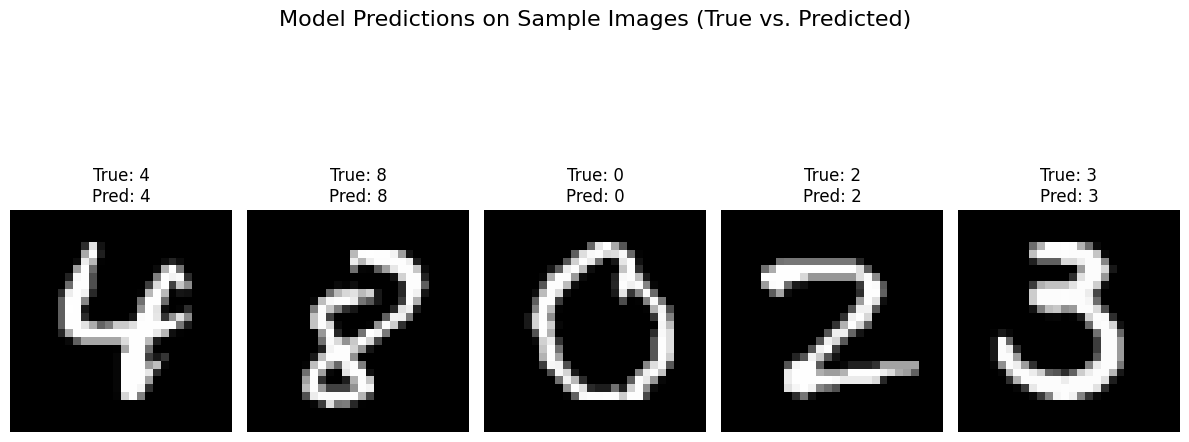

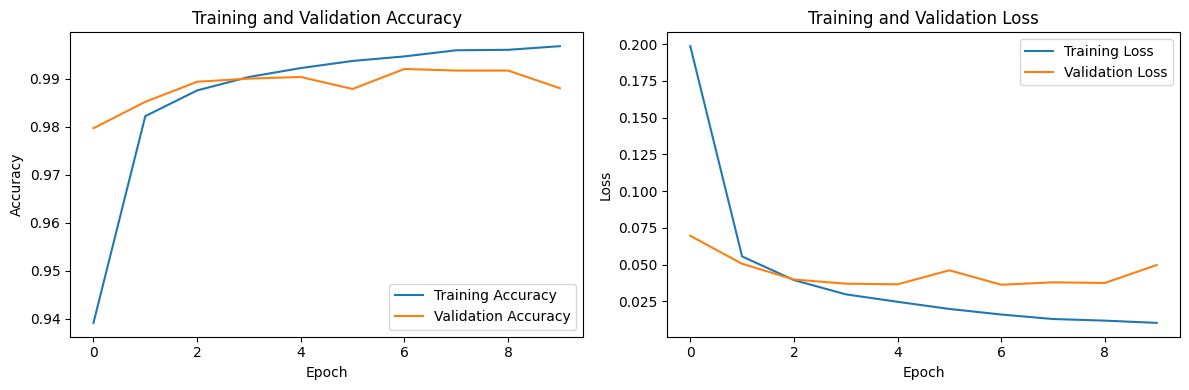

In [ ]:
# Task 2: Deep Learning with TensorFlow (Keras API)

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("--- Task 2: Deep Learning with TensorFlow ---")

# --- Load and Preprocess the MNIST Dataset ---

print("\nLoading and preprocessing MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape images to add a channel dimension (for CNNs: height, width, channels)
# MNIST images are grayscale, so channel is 1.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

# --- Build a CNN Model ---

print("\nBuilding CNN model...")
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'), # Another conv layer before flattening

    # Flatten the 3D output to 1D for the Dense layers
    layers.Flatten(),
    # Dense (Fully Connected) Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

# Display model summary
model.summary()

# --- Compile the Model ---

print("\nCompiling model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use this for integer labels (0-9)
              metrics=['accuracy'])
print("Model compiled.")

# --- Train the Model ---

print("\nTraining model...")
# Using a callback to stop training if accuracy doesn't improve after a few epochs
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=10, # Number of training iterations
                    validation_split=0.1, # Use 10% of training data for validation during training
                    batch_size=64, # Number of samples per gradient update
                    verbose=1) # Display progress bar during training
                    # callbacks=[early_stopping]) # Uncomment to use early stopping
print("Model training complete.")

# --- Evaluate the Model ---

print("\nEvaluating model on test data...")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check if target accuracy is met
if test_accuracy > 0.95:
    print("Achieved >95% test accuracy! 🎉")
else:
    print("Test accuracy is below 95%. Consider more epochs, different architecture, or hyperparameter tuning.")

# --- Visualize Model's Predictions on 5 Sample Images ---

print("\nVisualizing model predictions on 5 sample images...")
# Get 5 random indices from the test set
sample_indices = np.random.choice(len(test_images), 5, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Make predictions
predictions = model.predict(sample_images)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.suptitle("Model Predictions on Sample Images (True vs. Predicted)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Task 3: NLP with spaCy

# Import necessary libraries
import spacy

print("--- Task 3: NLP with spaCy ---")

# --- Load a pre-trained spaCy model ---
# You need to download a spaCy model first if you haven't:
# For example, run in your terminal: python -m spacy download en_core_web_sm
# Or for a larger model: python -m spacy download en_core_web_md
try:
    nlp = spacy.load("en_core_web_sm")
    print("\nspaCy model 'en_core_web_sm' loaded successfully.")
except OSError:
    print("\nError: spaCy model 'en_core_web_sm' not found.")
    print("Please run 'python -m spacy download en_core_web_sm' in your terminal and try again.")
    exit() # Exit if the model isn't available

# --- Example Amazon Product Review Text Data ---
# In a real scenario, you'd load this from a CSV, JSON, or database.
amazon_reviews = [
    "I absolutely love my new Echo Dot! The sound quality is surprisingly good for its size, and Alexa understands my commands perfectly. Highly recommend this smart speaker.",
    "The Samsung Galaxy S24 Ultra has an amazing camera, but the battery life could be better. Still, a fantastic phone overall, especially for gaming and productivity.",
    "This 'PowerBoost Pro' blender is powerful, but it's incredibly noisy. It blends well, but I wish it was quieter. Good for smoothies, but not for a peaceful morning.",
    "My Apple AirPods Pro 2 are comfortable and the noise cancellation is superb. Best earbuds I've ever owned. Great product!",
    "I bought a cheap generic USB cable, and it broke after a week. Always go for original brands like Anker for cables.",
    "This 'Gourmet Chef' Air Fryer makes cooking so much easier! It's quick, efficient, and everything tastes great. A must-have kitchen appliance."
]

# --- Perform Named Entity Recognition (NER) ---

print("\n--- Named Entity Recognition (NER) Results ---")
for i, review in enumerate(amazon_reviews):
    doc = nlp(review)
    print(f"\nReview {i+1}: \"{review}\"")
    found_entities = []
    for ent in doc.ents:
        # Common entity types for products/brands might be ORG, PRODUCT, GPE, NORP (for nationalities sometimes used as brand-like)
        # We'll primarily look for ORG (organizations, often brands) and PRODUCT if available in the model.
        # en_core_web_sm might not have a dedicated 'PRODUCT' label, but 'ORG' or 'LOC' might capture some.
        # We can also add custom rules or patterns for specific product names.
        if ent.label_ in ["ORG", "PRODUCT", "WORK_OF_ART", "PERSON", "NORP", "FAC", "GPE"]: # Expanding for more possibilities
             found_entities.append(f"'{ent.text}' (Label: {ent.label_})")
    if found_entities:
        print("  Extracted Entities:")
        for entity_str in found_entities:
            print(f"    - {entity_str}")
    else:
        print("  No significant entities extracted by default model.")

# --- Analyze Sentiment using a Rule-Based Approach ---
# This is a very basic rule-based approach for demonstration.
# For more robust sentiment, consider TextBlob, VADER, or fine-tuning a classifier.

print("\n--- Rule-Based Sentiment Analysis Results ---")

positive_keywords = ["love", "amazing", "fantastic", "superb", "great", "excellent", "highly recommend", "must-have", "good", "efficient", "easier", "perfectly"]
negative_keywords = ["noisy", "broken", "wish it was quieter", "could be better", "cheap", "errors", "bad", "disappointing"]

def analyze_sentiment_rule_based(text):
    text_lower = text.lower()
    positive_score = sum(1 for keyword in positive_keywords if keyword in text_lower)
    negative_score = sum(1 for keyword in negative_keywords if keyword in text_lower)

    if positive_score > negative_score:
        return "Positive"
    elif negative_score > positive_score:
        return "Negative"
    else:
        return "Neutral"

for i, review in enumerate(amazon_reviews):
    sentiment = analyze_sentiment_rule_based(review)
    print(f"Review {i+1}: \"{review[:70]}...\"") # Print first 70 chars
    print(f"  Sentiment: {sentiment}")

# Example of how spaCy can be used for custom rule-based entity extraction
# For specific product names not covered by standard NER labels,
# you can use spaCy's PhraseMatcher or EntityRuler.
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
# Define patterns for specific products/brands that might not be caught by default NER
product_patterns = [
    nlp("Echo Dot"), nlp("Samsung Galaxy S24 Ultra"), nlp("PowerBoost Pro"),
    nlp("Apple AirPods Pro 2"), nlp("Anker"), nlp("Gourmet Chef Air Fryer")
]
matcher.add("PRODUCT_BRAND", product_patterns)

print("\n--- Custom Product/Brand Extraction with PhraseMatcher ---")
for i, review in enumerate(amazon_reviews):
    doc = nlp(review)
    matches = matcher(doc)
    extracted_custom_entities = []
    for match_id, start, end in matches:
        span = doc[start:end]
        extracted_custom_entities.append(span.text)

    print(f"Review {i+1}: \"{review[:70]}...\"")
    if extracted_custom_entities:
        print(f"  Custom Extracted Product/Brand: {', '.join(extracted_custom_entities)}")
    else:
        print("  No specific products/brands found by custom matcher.")

--- Task 3: NLP with spaCy ---

spaCy model 'en_core_web_sm' loaded successfully.

--- Named Entity Recognition (NER) Results ---

Review 1: "I absolutely love my new Echo Dot! The sound quality is surprisingly good for its size, and Alexa understands my commands perfectly. Highly recommend this smart speaker."
  Extracted Entities:
    - 'Alexa' (Label: ORG)

Review 2: "The Samsung Galaxy S24 Ultra has an amazing camera, but the battery life could be better. Still, a fantastic phone overall, especially for gaming and productivity."
  No significant entities extracted by default model.

Review 3: "This 'PowerBoost Pro' blender is powerful, but it's incredibly noisy. It blends well, but I wish it was quieter. Good for smoothies, but not for a peaceful morning."
  No significant entities extracted by default model.

Review 4: "My Apple AirPods Pro 2 are comfortable and the noise cancellation is superb. Best earbuds I've ever owned. Great product!"
  No significant entities extracted by d